# Zadanie 1. Oblicz przybliżoną wartość pochodnej funkcji,

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns

sns.set_style("darkgrid")

In [2]:
def f_derivative(x, h):
    return (f(x + h) - f(x)) / h


def f(x):
    return np.tan(x)


def f_tan_actual_derivative(x):
    return 1 + np.tan(x) ** 2


def sec(x):
    return 1 / np.cos(x)


def second_derivative(x):
    return 2 * sec(x) ** 2 * np.tan(x)

In [3]:
method_list = []
rounding_list = []
computational_list = []
h_list = []

for k in range(17):
    h = 10 ** (-k)
    x = 1
    h_list.append(h)
    method_error = second_derivative(x) * h / 2
    rounding_error = 2 * sys.float_info.epsilon / h
    computational_error = abs(f_derivative(x, h) - f_tan_actual_derivative(x))
    method_list.append(method_error)
    rounding_list.append(rounding_error)
    computational_list.append(computational_error)

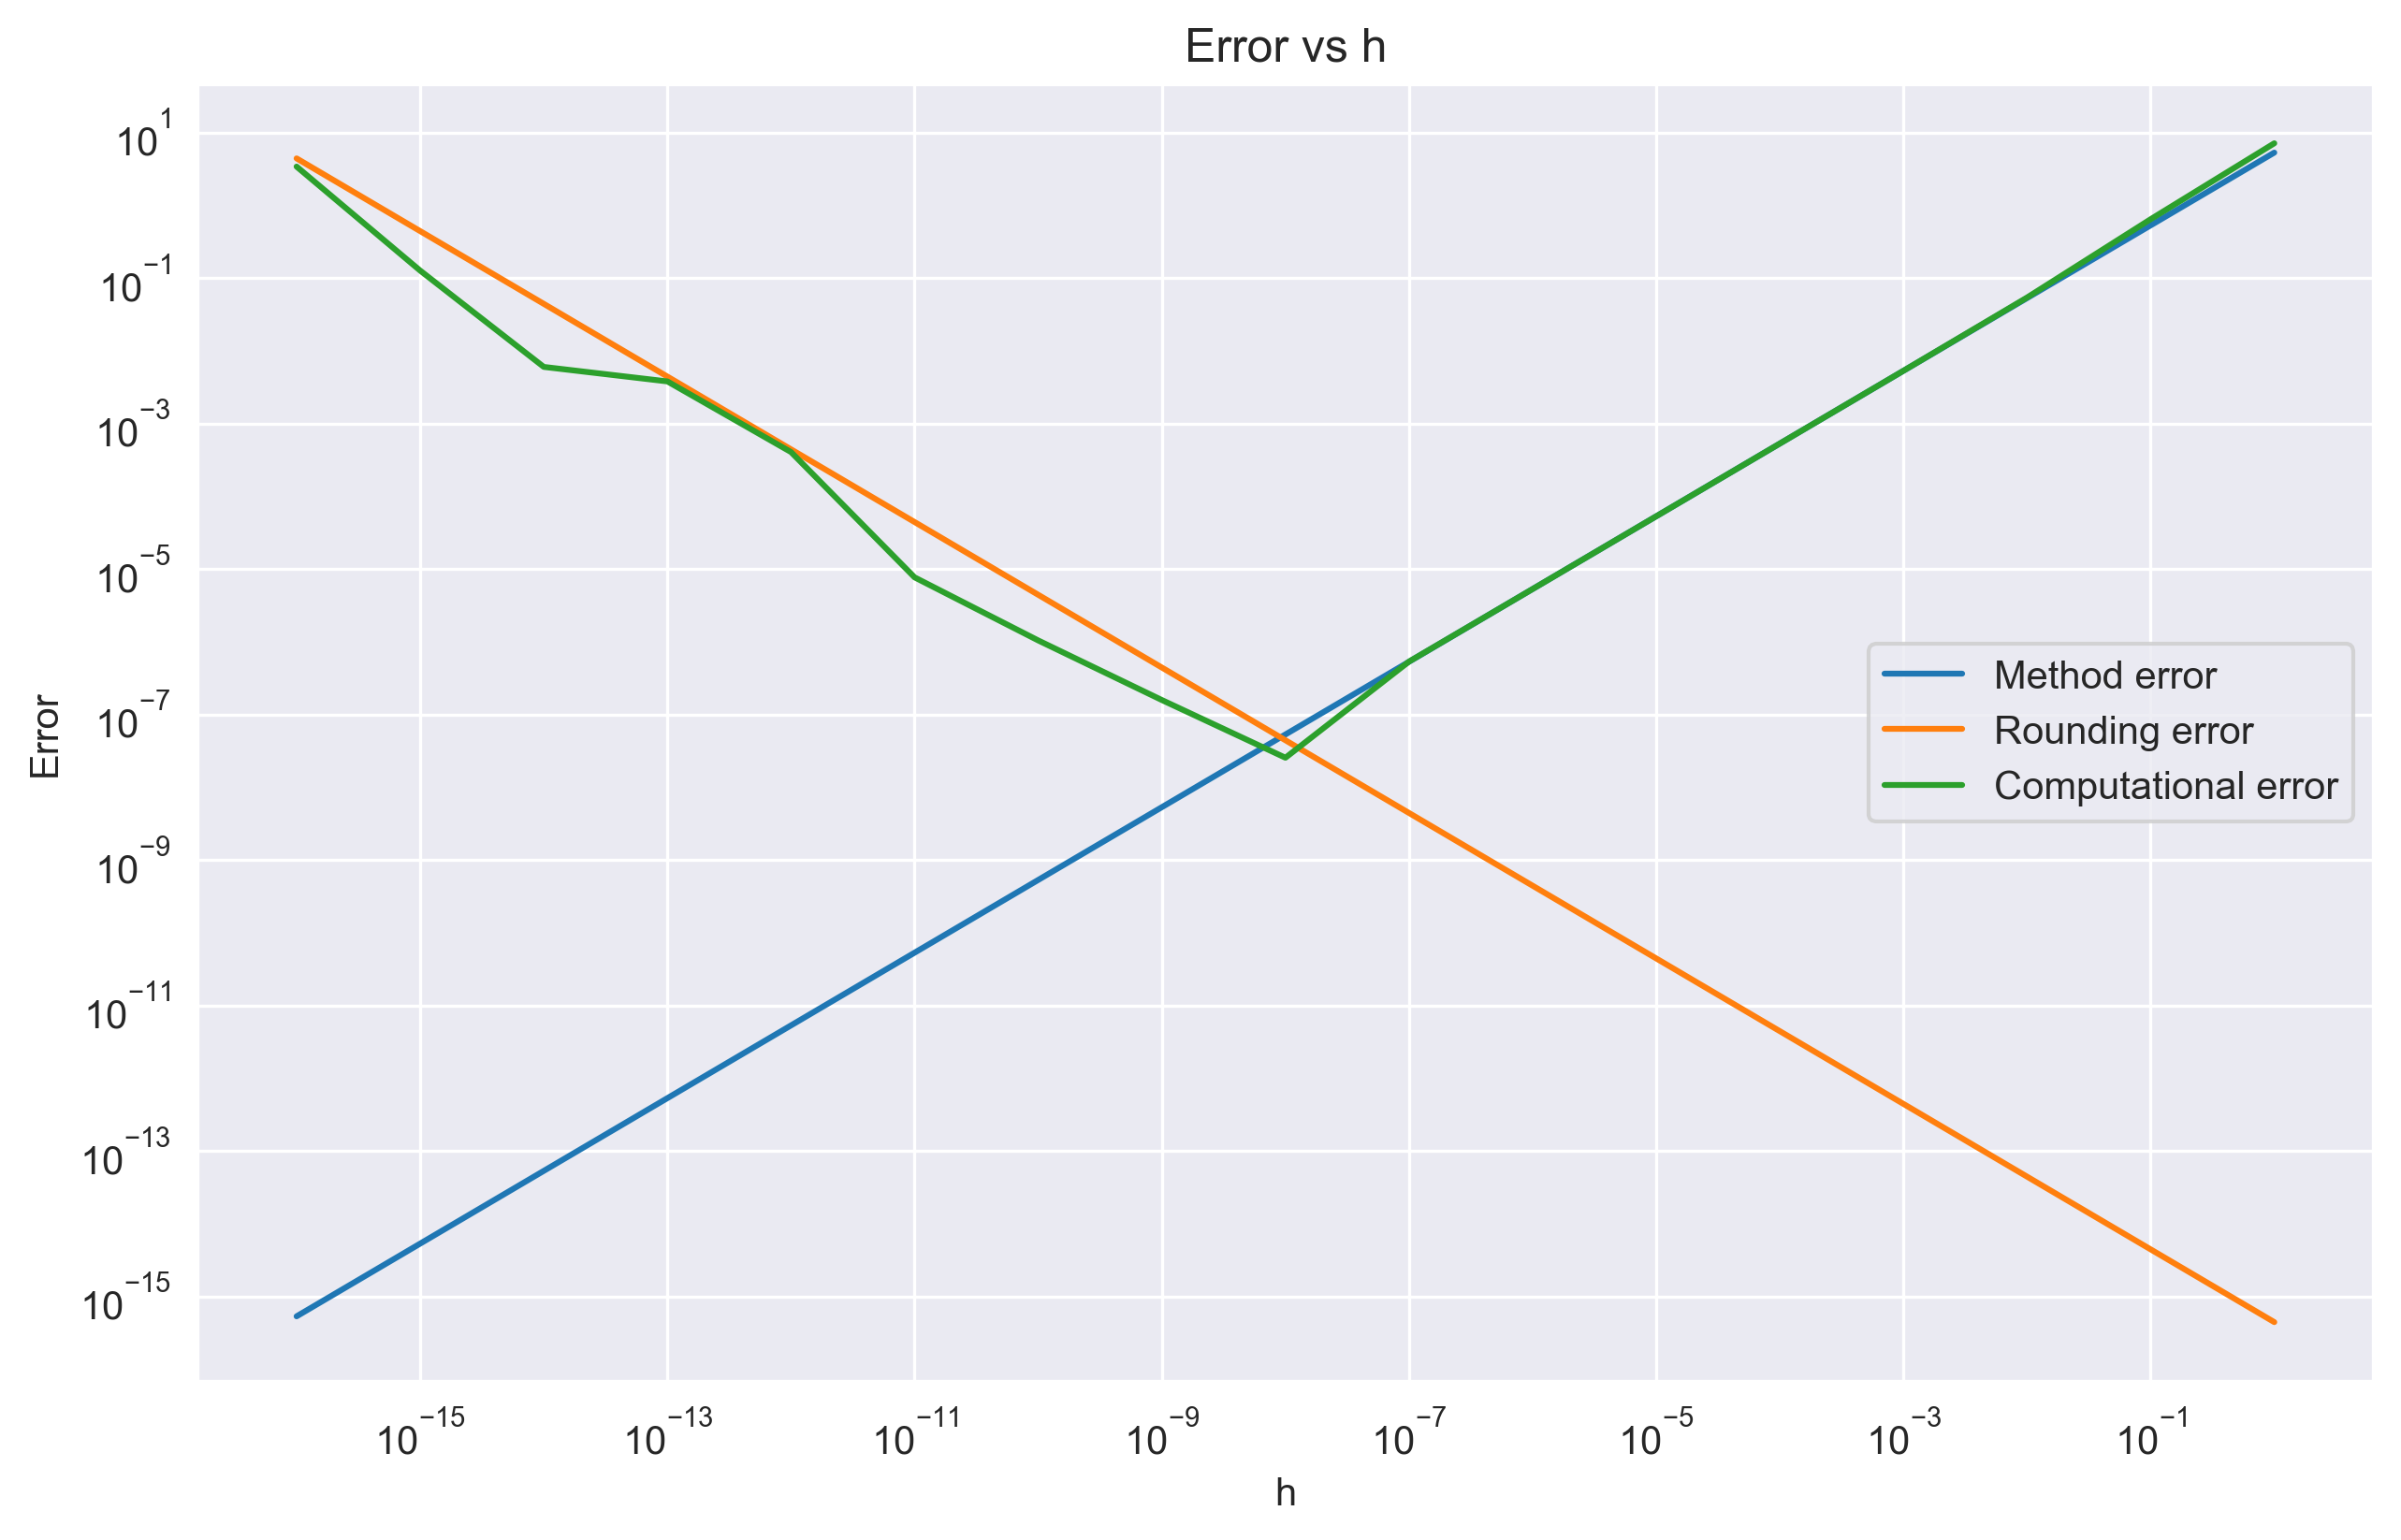

In [4]:
plt.figure(dpi=300, figsize=(10, 6))
plt.loglog(h_list, method_list, label="Method error")
plt.loglog(h_list, rounding_list, label="Rounding error")
plt.loglog(h_list, computational_list, label="Computational error")
plt.legend()
plt.xlabel("h")
plt.ylabel("Error")
plt.title("Error vs h")
plt.show()

In [5]:
computational_error_min = computational_list.index(np.min(computational_list))

h_min = 2 * np.sqrt(sys.float_info.epsilon / second_derivative(x))
print(f"the h_min is {h_min}")
print(f"Minimum computational error: h_min={10**-computational_error_min}")

the h_min is 9.123695225180455e-09
Minimum computational error: h_min=1e-08


In [6]:
def f_derivative_central(x, h):
    return (f(x + h) - f(x - h)) / (2 * h)


def third_derivative(x):
    return 4 * sec(x) ** 2 * np.tan(x) ** 2 + 2 * sec(x) ** 4

In [7]:
method_list = []
rounding_list = []
computational_list = []
h_list = []
for k in range(17):
    h = 10 ** (-k)
    x = 1
    h_list.append(h)
    method_error = third_derivative(x) * h**2 / 6
    rounding_error = sys.float_info.epsilon / h
    computational_error = abs(f_derivative_central(x, h) - f_tan_actual_derivative(x))
    method_list.append(method_error)
    rounding_list.append(rounding_error)
    computational_list.append(computational_error)


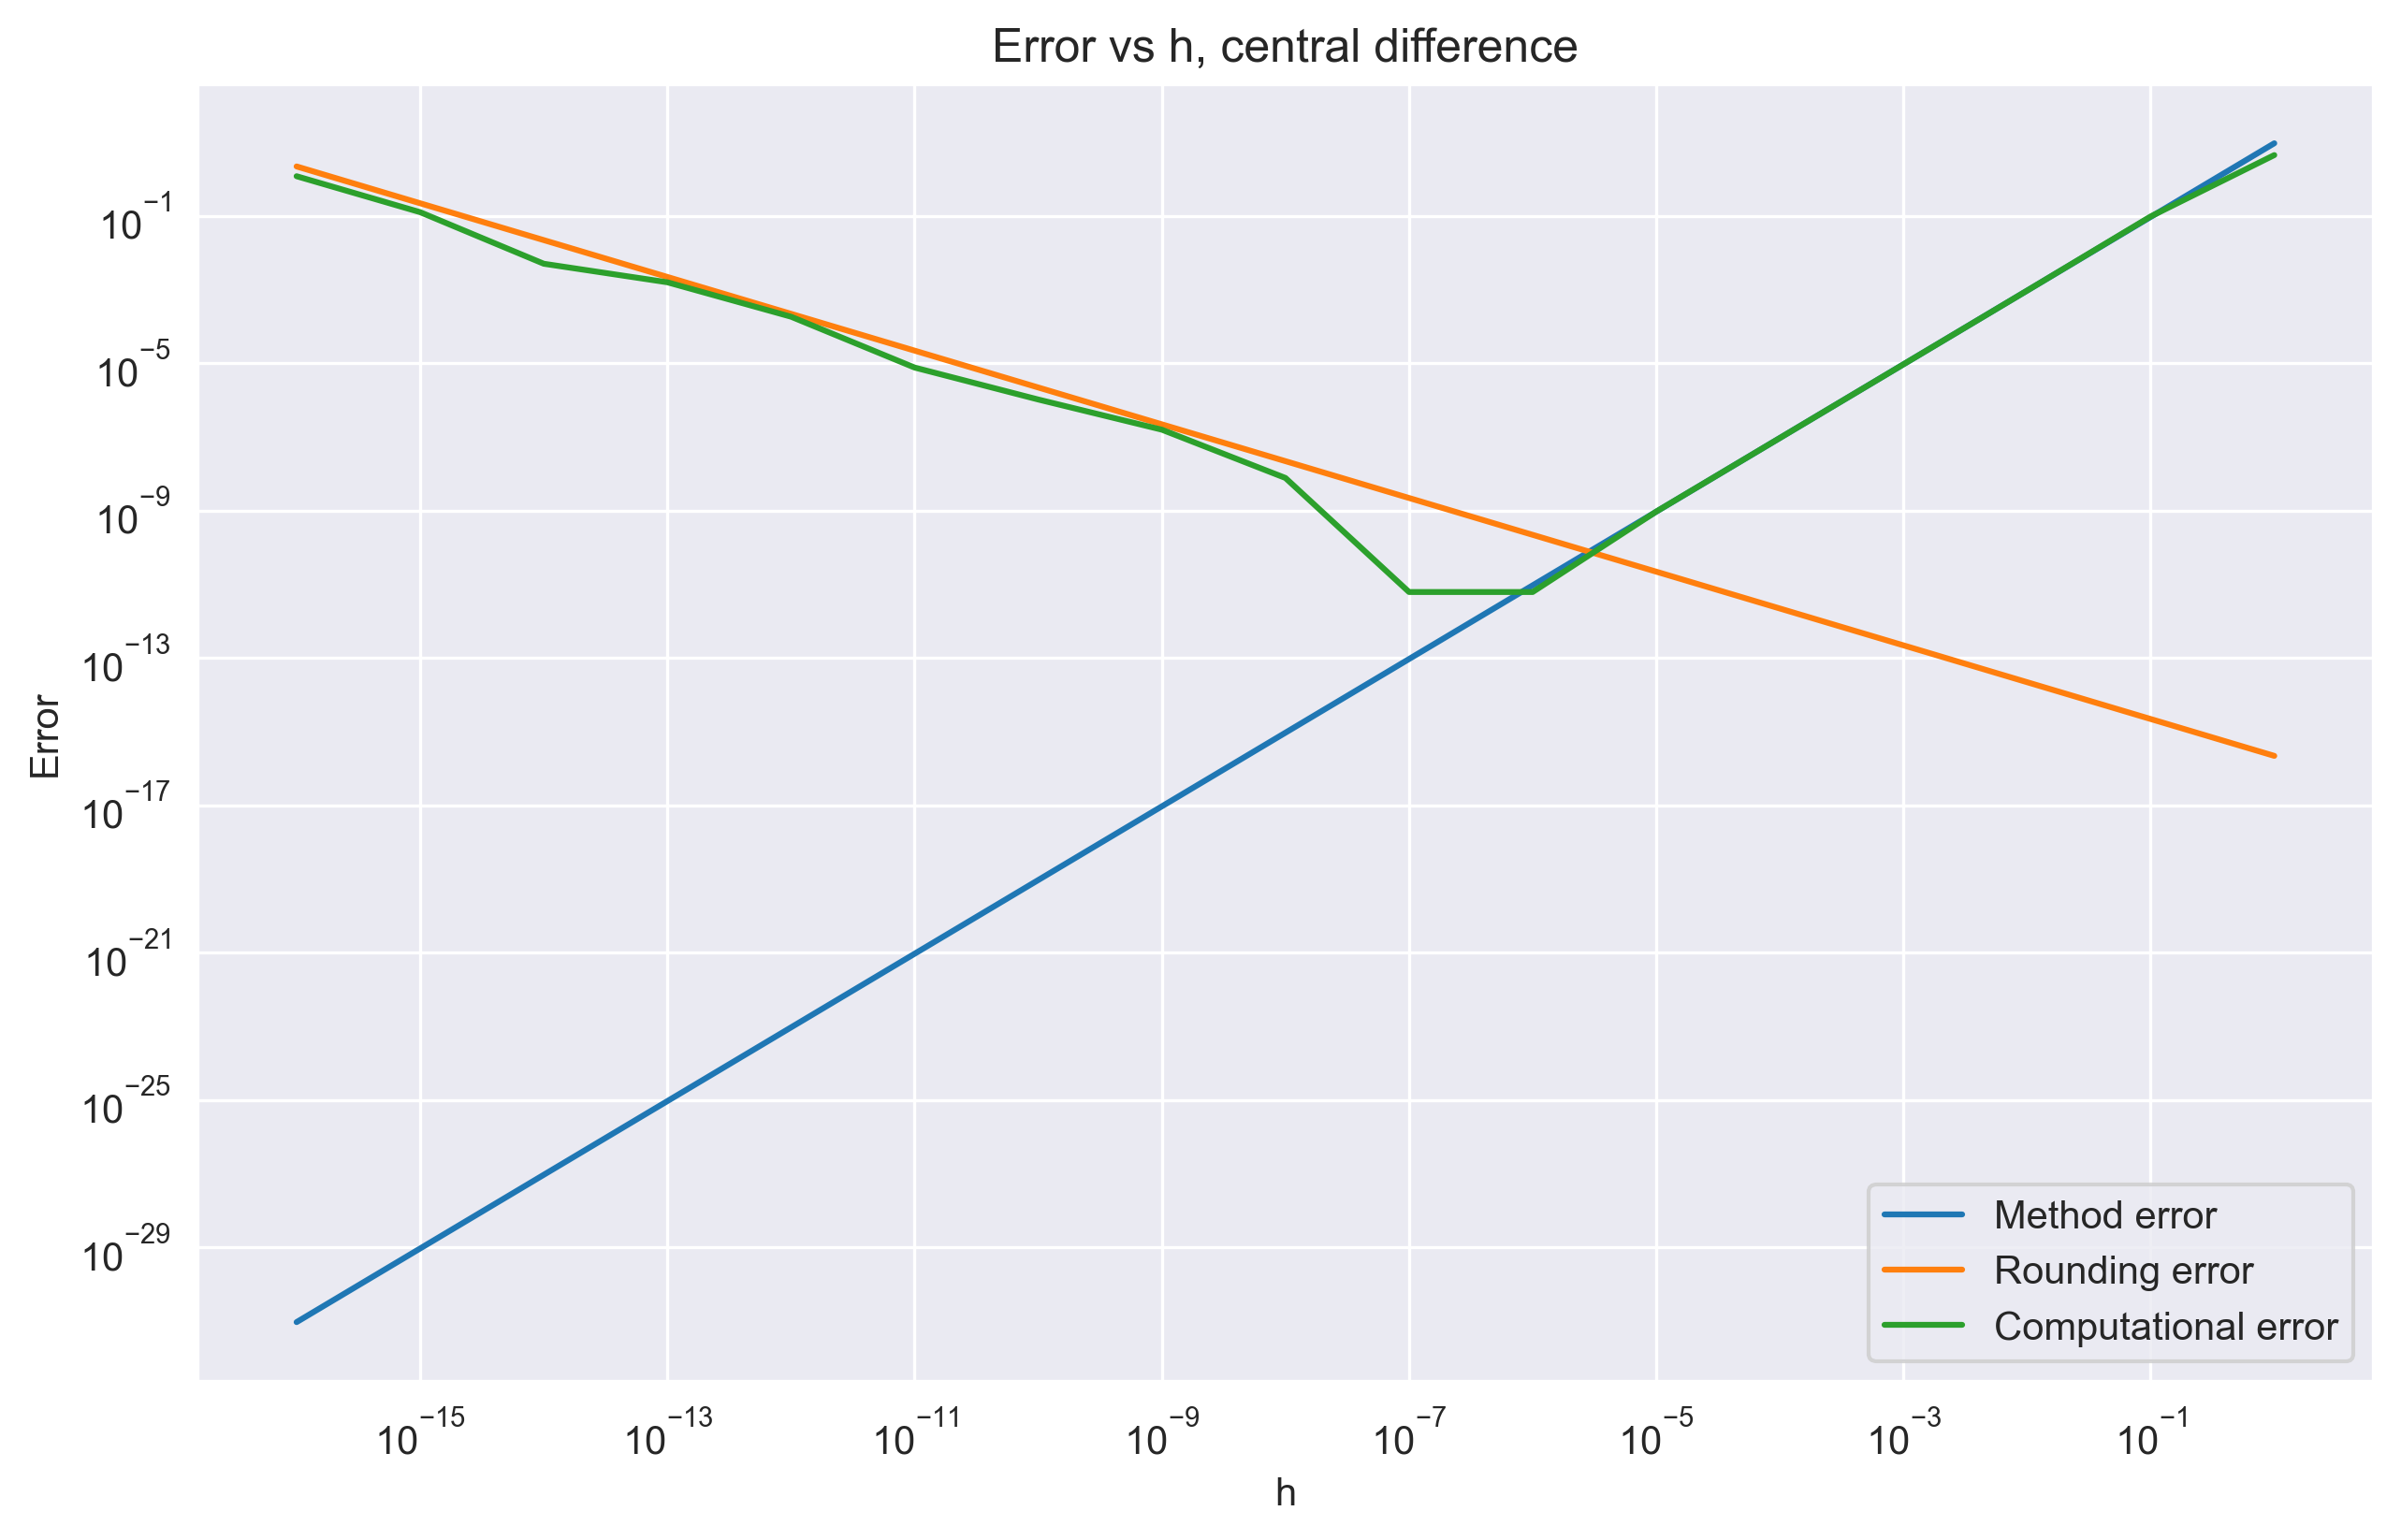

In [8]:
plt.figure(dpi=300, figsize=(10, 6))
plt.loglog(h_list, method_list, label="Method error")
plt.loglog(h_list, rounding_list, label="Rounding error")
plt.loglog(h_list, computational_list, label="Computational error")
plt.legend()
plt.xlabel("h")
plt.ylabel("Error")
plt.title("Error vs h, central difference")
plt.show()

In [9]:
computational_error_min = computational_list.index(np.min(computational_list))

h_min_2 = (3 * sys.float_info.epsilon / third_derivative(x)) ** (1 / 3)

print(f"the h_min is {h_min_2}")
print(f"Minimum computational error: {computational_error_min}")


the h_min is 2.273274156839064e-06
Minimum computational error: 6


In [10]:
# print(f"the h_min_1 is {h_min}")
# print(f"the h_min_2 is {h_min_2}")

method_error = abs(f_derivative(x, h_min) - f_tan_actual_derivative(x))
rounding_error = sys.float_info.epsilon / h_min
computational_error = method_error + rounding_error
print(f"Wynik błędu dla metody granicznej {computational_error}")

method_error = abs(f_derivative_central(x, h_min_2) - f_tan_actual_derivative(x))
rounding_error = sys.float_info.epsilon / h_min_2
computational_error = method_error + rounding_error
print(f"Wynik błędu dla metody centralnej {computational_error}")

Wynik błędu dla metody granicznej 4.262482708274601e-08
Wynik błędu dla metody centralnej 1.8445825949050509e-10
